In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# MEI V2 Data

In [ ]:
url = "https://www.psl.noaa.gov/enso/mei/data/meiv2.data"
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Save the data to a file
    with open('meiv2.data', 'w') as file:
        file.write(response.text)
else:
    print("Failed to retrieve data")

In [2]:

# Read the data into a DataFrame, delim tab, no header, last lines delete, skip first line
enso_mei = pd.read_csv('meiv2.data', delim_whitespace=True, header=None, skipfooter=3, engine='python', skiprows=1)
#Set first column as index as year, remove 0 column index
enso_mei = enso_mei.set_index(0)
enso_mei.index.name = None
#Set column names as bi monthly periods (Dec/Jan, Jan/Feb, etc)
enso_mei.columns = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
#Remove last row and all -999.00 values
enso_mei = enso_mei.iloc[:-1]
enso_mei = enso_mei.replace(-999.00, None)
#Row index to YYYY format
enso_mei.index = pd.to_datetime(enso_mei.index, format='%Y')
display(enso_mei.head())
display(enso_mei.tail())

FileNotFoundError: [Errno 2] No such file or directory: 'meiv2.data'

## Create timeseries with date

In [5]:
#Reformat data to have one column for year, one column for month, and one column for MEI value
#Create empty dataframe
enso_mei_long = pd.DataFrame()
#Create empty list for year, month, and mei values
year = []
month = []
mei = []
#Loop through each row in the dataframe
for index, row in enso_mei.iterrows():
    #Loop through each column in the dataframe
    for column in enso_mei.columns:
        #Append the year, month, and mei value to the corresponding list
        year.append(index.year)
        month.append(column)
        mei.append(row[column])
#Add the lists to the dataframe
enso_mei_long['Year'] = year
enso_mei_long['Month'] = month
enso_mei_long['MEI'] = mei
#Set the index as the year and month
enso_mei_long = enso_mei_long.set_index(['Year', 'Month'])
display(enso_mei_long.head(20))
#Save CSV file
#enso_mei_long.to_csv('enso_mei_long.csv')



MEI
Year Month      
1979 Jan    0.47
     Feb    0.27
     Mar   -0.04
     Apr    0.26
     May    0.35
     Jun   -0.14
     Jul   -0.13
     Aug    0.50
     Sep    0.42
     Oct    0.28
     Nov    0.58
     Dec    0.68
1980 Jan    0.42
     Feb    0.30
     Mar    0.52
     Apr    0.85
     May    0.71
     Jun    0.55
     Jul    0.52
     Aug    0.13

In [3]:
enso_mei_long = pd.read_csv('Data/enso_mei_long.csv')
# Combine the Year and Month columns to create a new Date column
enso_mei_long['Date'] = enso_mei_long['Year'].astype(str) + '-' + enso_mei_long['Month']
# Convert the new Date column to datetime format
enso_mei_long['Date'] = pd.to_datetime(enso_mei_long['Date'], format='%Y-%b')
#Plot the data
plt.figure(figsize=(12, 6))
plt.plot(enso_mei_long['Date'], enso_mei_long['MEI'], linestyle='-', color='black', linewidth=0.5)
#Only plot until 2024 x axis
plt.xlim(pd.Timestamp('1978-12-01'), pd.Timestamp('2024-01-01'))

plt.xlabel('Date')
plt.ylabel('MEI.V2')
#Create title, big font, bold
plt.title('ENSO MEI Values Over Time', fontsize=16, fontweight='bold')
plt.grid(False)
#Create dotted lines for El Nino and La Nina thresholds
plt.axhline(y=1, color='gray', linestyle='--', linewidth=0.5)
plt.axhline(y=-1, color='gray', linestyle='--', linewidth=0.5)
plt.axhline(y=2, color='gray', linestyle='--', linewidth=0.5)
plt.axhline(y=-2, color='gray', linestyle='--', linewidth=0.5)
#grey background between 1 and -1
plt.axhspan(-1, 1, facecolor='white', alpha=0.2)
#Create thick solid line through 0
plt.axhline(y=0, color='black', linestyle='-', linewidth=1)
#Fill line above 0 with light red  
plt.fill_between(enso_mei_long['Date'], enso_mei_long['MEI'], where=enso_mei_long['MEI'] >= 0, color='red', alpha=0.3)
#Fill line below 0 with light blue
plt.fill_between(enso_mei_long['Date'], enso_mei_long['MEI'], where=enso_mei_long['MEI'] <= 0, color='blue', alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
#Save plot in Plots folder with full quality
plt.savefig('Plots/enso_mei_long.png', dpi=300)

FileNotFoundError: [Errno 2] No such file or directory: 'Data/enso_mei_long.csv'

**Highlight El Niño highest cases**

In [8]:
#Highlight El Nino and La Nina periods
#Create empty list for El Nino and La Nina periods
el_nino = []
la_nina = []
#Loop through each row in the dataframe
for index, row in enso_mei_long.iterrows():
    #If MEI value is greater than 1, append the date to the El Nino list
    if row['MEI'] > 1:
        el_nino.append(enso_mei_long.loc[index, 'Date'])
    #If MEI value is less than -1, append the date to the La Nina list
    elif row['MEI'] < -1:
        la_nina.append(enso_mei_long.loc[index, 'Date'])
#Create a dataframe for El Nino and La Nina periods
el_nino = pd.DataFrame(el_nino, columns=['Date'])
la_nina = pd.DataFrame(la_nina, columns=['Date'])
#From data collect years which have continuous el nino or la nina periods
el_nino['Year'] = el_nino['Date'].dt.year
la_nina['Year'] = la_nina['Date'].dt.year
#Group by year and count the number of El Nino and La Nina periods
el_nino_grouped = el_nino.groupby('Year').count()
la_nina_grouped = la_nina.groupby('Year').count()

display(el_nino, el_nino_grouped)

,Date,Year
0,1982-06-01,1982
1,1982-07-01,1982
2,1982-08-01,1982
3,1982-09-01,1982
4,1982-10-01,1982
...,...,...
66,2016-01-01,2016
67,2016-02-01,2016
68,2016-03-01,2016
69,2016-04-01,2016


,Date
Year,
1982,7
1983,6
1986,3
1987,9
1991,4
1992,6
1993,3
1994,2
1997,8


# FEMA Natural Disasters Dataset

## Import data and change

In [149]:
#Import data from CSV file
fema_disasters = pd.read_csv('Data/DisasterDeclarationsSummaries.csv')
#Quick view of data
# display(fema_disasters.dtypes)
# display(fema_disasters.describe())
#List all types of incidenType

#Remove non natural disasters
#From incidentType column, drop: 'Other', 'Human Cause', 'Terrorist' and 'Chemical' from the dataset
non_natural_disasters = ['Other', 'Human Cause', 'Terrorist', 'Chemical', 'Biological']
fema_disasters = fema_disasters[~fema_disasters['incidentType'].isin(non_natural_disasters)]

display(fema_disasters.head())
#display unique declarationTitle


,femaDeclarationString,disasterNumber,state,declarationType,declarationDate,fyDeclared,incidentType,declarationTitle,ihProgramDeclared,iaProgramDeclared,...,tribalRequest,fipsStateCode,fipsCountyCode,placeCode,designatedArea,declarationRequestNumber,lastIAFilingDate,lastRefresh,hash,id
0,FM-5465-NM,5465,NM,FM,2023-05-10T00:00:00.000Z,2023,Fire,LAS TUSAS FIRE,0,0,...,0,35,33,99033,Mora (County),23050,NaN,2023-05-22T03:41:22.800Z,56e2cdd7de53fd6bd0cbe22cd681d0d87708d0ac,e46df225-24a5-4178-9368-0f1c753f8748
1,FM-5465-NM,5465,NM,FM,2023-05-10T00:00:00.000Z,2023,Fire,LAS TUSAS FIRE,0,0,...,0,35,47,99047,San Miguel (County),23050,NaN,2023-05-22T03:41:22.800Z,33f747f70112aed4df749cfb1dd58f1d50f029ff,c8660535-8995-4187-af20-771b5669d4b7
2,FM-5464-RI,5464,RI,FM,2023-04-14T00:00:00.000Z,2023,Fire,QUEENS RIVER FIRE,0,0,...,0,44,9,99009,"Washington (County)(in (P)MSA 5520,6480)",23042,NaN,2023-05-22T03:41:22.800Z,1111d4d4a33f8a6e4d383ac5bd0e60b9bf142da0,9b9a9d9c-8b03-4049-9b16-a3c0d581556c
3,FM-5463-KS,5463,KS,FM,2023-04-13T00:00:00.000Z,2023,Fire,HADDAM FIRE,0,0,...,0,20,201,99201,Washington (County),23038,NaN,2023-05-22T03:41:22.800Z,78dd55a181f146622eb65835b5d794689d1ea7f2,57d936ce-a0d7-412a-9d78-18aee530c146
4,FM-5462-NE,5462,NE,FM,2023-04-09T00:00:00.000Z,2023,Fire,WACONDA-BEAVER LAKE FIRE COMPLEX,0,0,...,0,31,25,99025,Cass (County),23036,NaN,2023-05-22T03:41:22.800Z,5b35b5912f606a21ff29194317052ac7c2541be8,69325b2c-77cf-493f-8f1a-d5b5a737edf8


array(['LAS TUSAS FIRE', 'QUEENS RIVER FIRE', 'HADDAM FIRE', ...,
       'SEVERE STORM AND TORNADOES', 'HURRICANE LEE',
       'LOST HORSE CREEK FIRE'], dtype=object)

In [161]:
#Create dataset with one column representing all the unique fipsStateCode, another column representing he fipsCountyCode and the rest of the columns representing the years from 1953 to 2023. The values in the columns will be the number of disasters in that year for that state and county.
#Create empty dataframe
fema_disasters_long = pd.DataFrame()
#Create empty lists for state, county, and year
state = []
county = []
year = []
state_name = []
#declaration_title = []
#Loop through each row in the dataframe
for index, row in fema_disasters.iterrows():
    #Append the state, county, and year to the corresponding list
    state.append(row['fipsStateCode'])
    state_name.append(row['state'])
    county.append(row['fipsCountyCode'])
    year.append(row['fyDeclared'])
    #declaration_title.append(row['declarationTitle'])
#Add the lists to the dataframe
fema_disasters_long['StateCode'] = state
fema_disasters_long['State'] = state_name
fema_disasters_long['CountyCode'] = county
fema_disasters_long['Year'] = year
#fema_disasters_long['DeclarationTitle'] = declaration_title
display(fema_disasters_long.head())
#Count unique declarationTitle for each state and county
fema_disasters_long = fema_disasters_long.groupby(['State', 'CountyCode', 'Year']).size().reset_index(name='Disasters')
display(fema_disasters_long)
#Create a pivot table with state and county as the index, year as the columns, and disasters as the values
fema_disasters_long = fema_disasters_long.pivot_table(index=['State', 'CountyCode'], columns='Year', values='Disasters')
#Fill NaN values with 0
fema_disasters_long = fema_disasters_long.fillna(0)

#Create plot of the number of disasters per year for each state

display(fema_disasters_long.head(40))

#Save CSV file
#fema_disasters_long.to_csv('fema_disasters_long.csv')


,StateCode,State,CountyCode,Year
0,35,NM,33,2023
1,35,NM,47,2023
2,44,RI,9,2023
3,20,KS,201,2023
4,31,NE,25,2023


,State,CountyCode,Year,Disasters
0,AK,0,1964,1
1,AK,0,1967,1
2,AK,0,1970,2
3,AK,0,1971,2
4,AK,0,1973,1
...,...,...,...,...
42900,WY,43,2017,1
42901,WY,45,1978,1
42902,WY,45,2001,2
42903,WY,45,2011,1


Year              1953  1954  1955  1956  1957  1958  1959  1960  1961  1962   
State CountyCode                                                               
AK    0            0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  \
      13           0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
      16           0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
      20           0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
      50           0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
      60           0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
      68           0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
      70           0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
      90           0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
      100          0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
      110          0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
      122          0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
      150          0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
      164          0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
      170          0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
      180          0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
      185          0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
      188          0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
      195          0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
      230          0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
      240          0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
      261          0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
      270          0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
      280          0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
      290          0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
AL    0            0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   
      1            0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
      3            0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
      5            0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
      7            0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
      9            0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
      11           0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
      13           0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
      15           0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
      17           0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
      19           0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
      21           0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
      23           0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
      25           0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
      27           0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

Year              ...  2014  2015  2016  2017  2018  2019  2020  2021  2022   
State CountyCode  ...                                                         
AK    0           ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  \
      13          ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
      16          ...   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   1.0   
      20          ...   0.0   0.0   0.0   0.0   0.0   2.0   0.0   0.0   0.0   
      50          ...   2.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   4.0   
      60          ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
      6

## Create a Disasters Timeseries Per State

First aggregate and transpose dataset to create "Timeseries" data with *Max* disaster per state (we do not take sum for now since a state could be dealing with the same disaster on multiple counties, currently taking the sum leads to an overestimation of disasters.)

In [162]:
disasters_df = pd.read_csv("Data/fema_disasters_long.csv")
# Aggregating the data on a yearly basis per state
state_yearly_disasters = disasters_df.groupby('State').max().reset_index()

# Dropping the 'CountyCode' column as it is not needed
state_yearly_disasters = state_yearly_disasters.drop(columns='CountyCode')
display(state_yearly_disasters.head())
# Transposing the data to get years as rows and states as columns
state_yearly_disasters_transposed = state_yearly_disasters.transpose()

# Setting the first row (state codes) as column headers
state_yearly_disasters_transposed.columns = state_yearly_disasters_transposed.iloc[0]
state_yearly_disasters_transposed = state_yearly_disasters_transposed.drop(state_yearly_disasters_transposed.index[0])

# Resetting the index to get years as a column
state_yearly_disasters_transposed = state_yearly_disasters_transposed.reset_index()

# Renaming the index column to 'Year'
state_yearly_disasters_transposed = state_yearly_disasters_transposed.rename(columns={'index': 'Year'})

# Display the first few rows of the transformed data
state_yearly_disasters_transposed.head()

,State,1953,1954,1955,1956,1957,1958,1959,1960,1961,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,AK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,1.0,0.0,1.0,4.0,25.0,1.0,4.0,3.0
1,AL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,1.0,2.0,2.0,6.0,2.0,1.0,2.0
2,AR,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,...,2.0,1.0,2.0,1.0,0.0,2.0,4.0,0.0,1.0,1.0
3,AS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,1.0,0.0
4,AZ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,2.0,43.0,2.0,2.0,2.0


State,Year,AK,AL,AR,AS,AZ,CA,CO,CT,DC,...,TN,TX,UT,VA,VI,VT,WA,WI,WV,WY
0,1953,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1954,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1955,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1956,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1957,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


Create Grid plot of the max disaster timeseries for each state. Notice big peaks during Covid, this should be removed in some way.

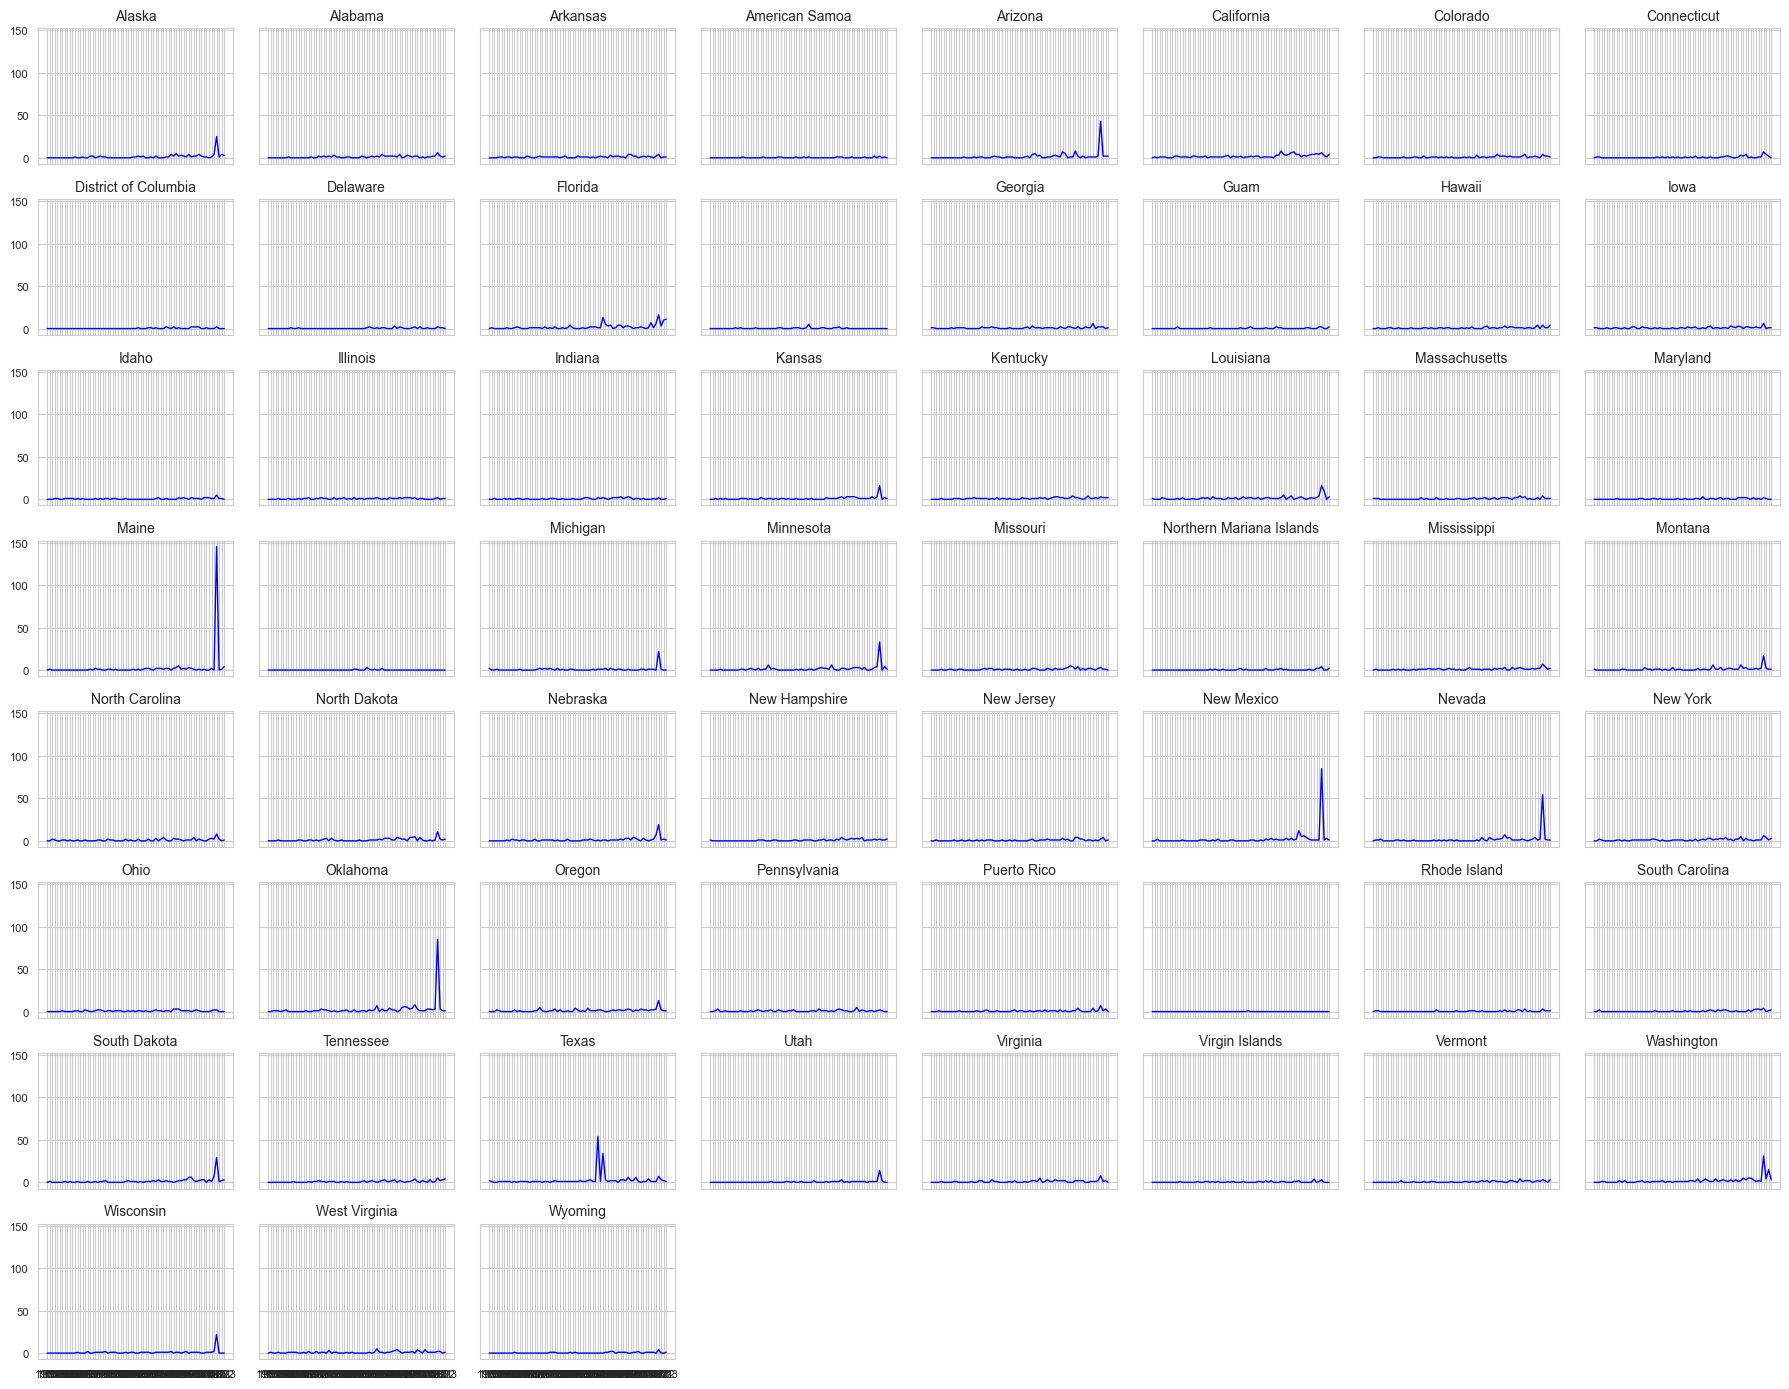

In [163]:
import usa
# Set the aesthetic style of the plots
sns.set_style("whitegrid")
# List of state codes to be used for plot titles
state_codes = state_yearly_disasters_transposed.columns[1:]
# Number of rows and columns for the grid plot
n_rows = 8
n_cols = 8
# Create a figure for the grid plot
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 14), sharex=True, sharey=True)
# Loop through each state and create a time series plot
for i, state_code in enumerate(state_codes):
    row = i // n_cols
    col = i % n_cols
    ax = axes[row, col]
    sns.lineplot(x='Year', y=state_code, data=state_yearly_disasters_transposed, ax=ax, color='b', linewidth=1)
    ax.set_title(usa.state_abbreviation_to_name(state_code), fontsize=10)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.tick_params(labelsize=8)
# Remove empty subplots
for i in range(len(state_codes), n_rows*n_cols):
    fig.delaxes(axes.flatten()[i])
# Adjust the layout
plt.tight_layout()
# Display the grid plot
plt.show()

Check ME peak

In [178]:
#Analyze Maine in fema_disasters dataset, find the most common incident type
#Create dataset with only Maine
fema_disasters_ME = fema_disasters[fema_disasters['state'] == 'ME']


#display(fema_disasters_ME)
#Group by incident type and count the number of disasters
fema_disasters_ME_sum = fema_disasters_ME.groupby('incidentType').size().reset_index(name='Disasters')
#Sort by number of disasters
fema_disasters_ME_sum = fema_disasters_ME_sum.sort_values(by='Disasters', ascending=False)
display(fema_disasters_ME_sum)


,incidentType,Disasters
6,Severe Storm,147
3,Flood,106
7,Snowstorm,81
5,Hurricane,50
2,Fishing Losses,16
4,Freezing,11
0,Coastal Storm,9
1,Fire,2


## Create Map Plot for 2022

In [107]:
import geopandas as gpd

# Filtering the row for the year 2022
disasters_2022 = state_yearly_disasters_transposed[state_yearly_disasters_transposed['Year'] == '2022']

# Melting the data to get the total number of disasters for each state in 2022
disasters_2022 = disasters_2022.melt(id_vars=['Year'], var_name='State', value_name='Disasters_2022')

# Convert the Disasters_2022 column to numeric
disasters_2022['Disasters_2022'] = pd.to_numeric(disasters_2022['Disasters_2022'])

# Display the data
disasters_2022.head()
#Save CSV file
#disasters_2022.to_csv('disasters_2022.csv')


/Users/yannickpichardo/.pyenv/versions/3.11.1/lib/python3.11/site-packages/geopandas/geodataframe.py:1474: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super().__getitem__(key)


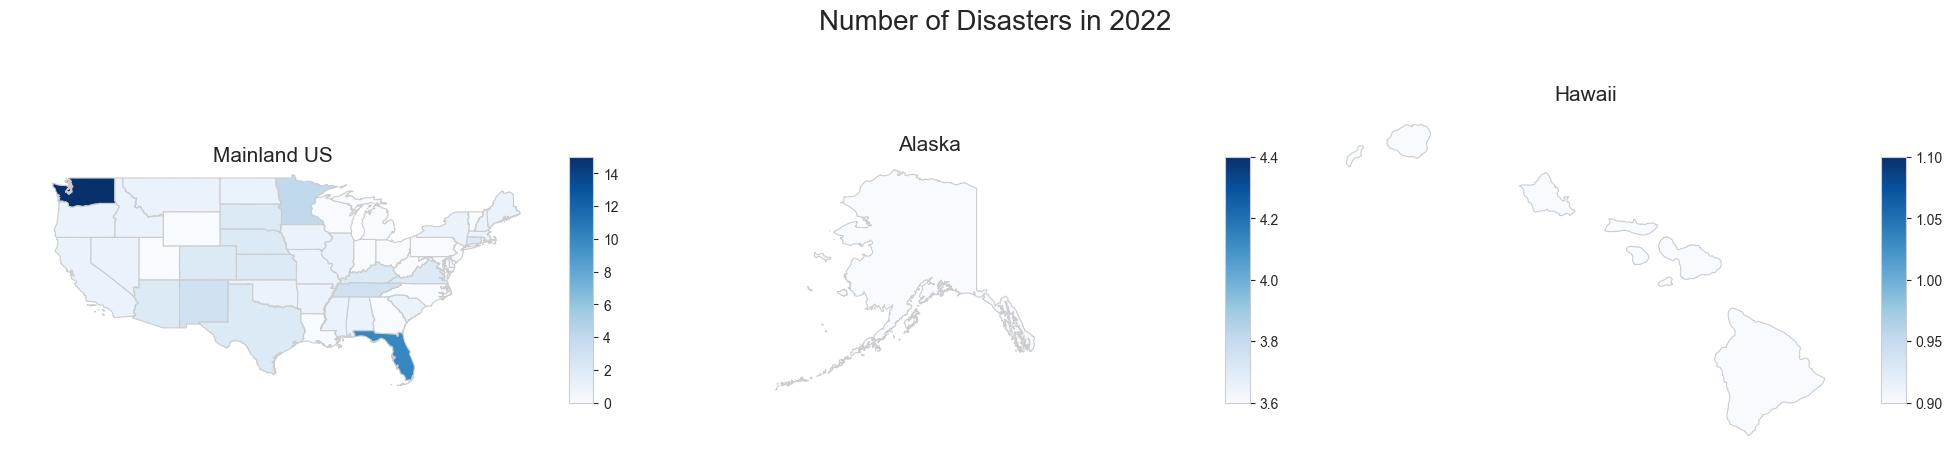

In [185]:
shapefile_path = "shapefile/usa/cb_2018_us_state_5m.shp"
us_shapefile = gpd.read_file(shapefile_path)
# Merge the disaster data with the shapefile data
us_shapefile = us_shapefile.merge(disasters_2022, left_on='STUSPS', right_on='State', how='left')

# Create separate plots for Alaska and Hawaii
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
#Remove all ax spines
for i in range(3):
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['bottom'].set_visible(False)
    ax[i].spines['left'].set_visible(False)

# Mainland US
us_shapefile[us_shapefile['STUSPS'] != 'HI'][us_shapefile['STUSPS'] != 'AK'].plot(column='Disasters_2022', cmap='Blues', linewidth=0.8, ax=ax[0], edgecolor='0.8', legend=True, legend_kwds={'shrink': 0.6, 'aspect': 10})
ax[0].set_xlim([-130, -65])
ax[0].set_ylim([24, 50])
ax[0].set_title('Mainland US', fontdict={'fontsize': '15', 'fontweight' : '3'})
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].grid(False)

# Alaska
us_shapefile[us_shapefile['STUSPS'] == 'AK'].plot(column='Disasters_2022', cmap='Blues', linewidth=0.8, ax=ax[1], edgecolor='0.8', legend=True, legend_kwds={'shrink': 0.6, 'aspect': 10})
ax[1].set_title('Alaska', fontdict={'fontsize': '15', 'fontweight' : '3'})
ax[1].set_xlim([-200, -100])
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].grid(False)

# Hawaii
us_shapefile[us_shapefile['STUSPS'] == 'HI'].plot(column='Disasters_2022', cmap='Blues', linewidth=0.8, ax=ax[2], edgecolor='0.8', legend=True, legend_kwds={'shrink': 0.6, 'aspect': 10})
ax[2].set_title('Hawaii', fontdict={'fontsize': '15', 'fontweight' : '3'})
ax[2].set_xticks([])
ax[2].set_yticks([])
ax[2].grid(False)

# Set the main title
plt.suptitle('Number of Disasters in 2022', fontsize=20)

# Display the plots
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


# Mortgage Lending

In [186]:
#Read in data from CSV file
# hmda_dynamic_2022 = pd.read_csv('Data/hmda_dynamic_2022.csv')
#Keep activity_year, state_code, county_code, 

# Call Reports (Avery File)